### Pre processing of our data

Importing all the necessary libraries:

In [330]:
#from rec3 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn import metrics
%matplotlib inline


In [331]:
techSalaries = pd.read_csv("techSalaries2017.csv") # load data 

In [332]:
# visualising our data
techSalaries
# df.columns = df.columns.str.replace(' ', '')
# Print the first 5 examples to see how the data looks.
# head returns the first 5 values in the dataframe 
# techSalaries.head()
# techSalaries.shape   # 62642 rows and 27 columns

quant_var = pd.DataFrame(techSalaries)


In [333]:
#Only use quantitave variables and drop any rows with missing values
    # dropna -> drops missing values
    # dropping variables 1-3 (Restrict those models to quantitative data only)
    # drop the column of high school 
    # drop the column of black race 
basesalary = techSalaries['basesalary']

quant_var = techSalaries.drop(columns=['company', 'title', 'location','Race_Black','Highschool','basesalary','stockgrantvalue','bonus'], axis=1)
gender_data = quant_var['gender']


# Drop only rows with all missing values 
quant_var = quant_var.dropna(how='all',axis=0)

# the number of data points 
N = len(quant_var) # The number of data points.
print ('N = {:d} data points'.format(N))

# drop only rows with missing rows values in column 22 (Education)
# quant_var = quant_var.dropna(subset=['Education'],axis=0)
# # drop only rows with missing rows values in column 21 (Race)
# quant_var = quant_var.dropna(subset=['Race'],axis=0)

N = 62642 data points


In [334]:
gender_data
#['Male'] = np.where(quant_var['gender']=='Male', 1, 0)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
62637     NaN
62638     NaN
62639     NaN
62640     NaN
62641    Male
Name: gender, Length: 62642, dtype: object

In [335]:
# cross validation 
# splitting our data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)


In [311]:
# plot our data (using scatter plot thingy)

# sns.scatterplot(x='X4 number of convenience stores',y='Y house price of unit area', data=df)
# random_seed = numpy.random.randint(0,100)
# random_seed = 65

# quant_var, y = quant_var(n_samples=2000, centers=2, n_features=2, random_state=random_seed)
# fig = plt.figure()
# # plt.plot(quant_var,y,'o',markersize=5)

# # plt.scatter(quant_var[:,0], quant_var[:,1])
# plt.show()

## Question 1 
Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?


In [312]:
#load data - same data for training and testing 

# part 1: finding the best predictor of total annual compensation
    # Do *not* include variables 5, 6 or 7 -> to drop   
    # drop race and education variables (as they are qualitative)

    
# # drop all the variables 11 -15 and teh race ones as well 
    # # do linear regression for each get the RSS 
    #     # FIND best one 
    # # do multi linear regression -> lab2 
    #     # compare RSS 


In [313]:
# linear regression for each predictor 
# i can use REC3 ->  linear regression 
# After removing all the predictors that would not be relevant for 
# predicting totalyearlycompensation
    # we are left with : 
        # yearsofexperience
        # yearsatcompany
        # Age 
        # Height
        # Zodiac
        # SAT 
        # GPA 

# to do later -> only leabe the above variables relevant to totalyearlycompensation
# and plot them using function bellow 
# sns.heatmap(quant_var.corr(),annot=True)
# plt.show()


In [315]:
# USING grid search to find best model
# from sklearn.model_selection import GridSearchCV
# param_grid = [
#  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#  ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#  scoring='neg_mean_squared_error',
# return_train_score=True)
# grid_search.fit(quant_var, quant_var)

In [316]:
# Using ridge regression to find optimal lambda: a scikit-learn implementation
# Load libraries:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV

new_data_  = quant_var.drop(columns=['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Hispanic', 'Race', 'Education', 'gender'], axis=1)

column_headers = list(new_data_.columns.values)
print("The Column Header :", column_headers)

X = new_data_
y = quant_var['totalyearlycompensation']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101) 


L_R = make_pipeline(StandardScaler(), LinearRegression())
L_R.fit(X_train,y_train)

mean_squared_error(y_test, L_R.predict(X_test))

LR_coef = L_R[-1].coef_

list(zip(column_headers, LR_coef))



The Column Header : ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'Age', 'Height', 'Zodiac', 'SAT', 'GPA']


[('totalyearlycompensation', 138557.21157590026),
 ('yearsofexperience', -4.501395915914933e-11),
 ('yearsatcompany', 3.835874977778506e-11),
 ('Age', -3.54914771887045e-11),
 ('Height', -2.8915444479955723e-12),
 ('Zodiac', -1.795572005915128e-11),
 ('SAT', 5.7628811508978064e-12),
 ('GPA', -7.464918580854543e-11)]

### Years of experience 

In [317]:
# MULTIPLE REGRESSION 
# reference (code from LAB2)
quant_var.skew()

X = quant_var[['yearsofexperience']]
y = quant_var['totalyearlycompensation']

# X = X.iloc[:,:-1].values 

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101) 

LR=LinearRegression()
LR.fit(X_train,y_train)# there is issue with the fitting 

# Predict and score the model
y_pred=LR.predict(X_test)
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_pred), len(y_test))



/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_1134/561104383.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  quant_var.skew()


'The r-squared score for your model was 0.18775146904808027 on 18793 values.'

In [318]:
# plot 
# sns.regplot(x = X,y = y)
# plt.show()

## Multiple full linear regression 


119678.81217126836 128975.72520569556


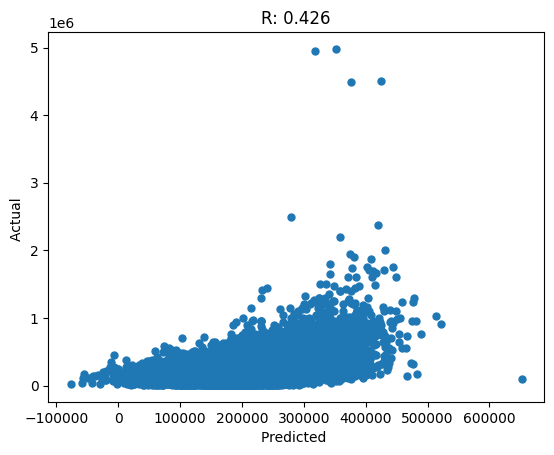

In [319]:
    # code from lab2
# Load data:
    #  Do *not* include variables 5(basesalary), 6(stockgrantvalue) or 7(bonus)
    # also drop education and race and gender (not numerical)
    # also drop 11 - 20
x_ = quant_var[['yearsatcompany', 'Age', 'Height', 'SAT','GPA','yearsofexperience']]
y = quant_var['totalyearlycompensation']

x = x_.iloc[:,:-1].values 

# 2. Doing the full model and calculating the yhats:
model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_
y_hat = np.dot(b1,x.transpose()) + b0

# 3. Scatter plot between predicted and actual score of full model:
r = np.corrcoef(y_hat,y)
plt.plot(y_hat,y,'o',markersize=5)
plt.xlabel('Predicted ')
plt.ylabel('Actual ')
plt.title('R: {:.3f}'.format(r[0,1])) 

# 4. Splitting the dataset for cross-validation:
x1 = np.copy(x[0:100,:])
y1 = np.copy(y[0:100])
model = LinearRegression().fit(x1,y1)
b0_1, b1_1 = model.intercept_, model.coef_

x2 = np.copy(x[100:,:])
y2 = np.copy(y[100:])
model = LinearRegression().fit(x2,y2)
b0_2, b1_2 = model.intercept_, model.coef_

# 5. Cross-validation. Using the betas from one dataset, but
# measuring the error with the other dataset
y_hat1 = np.dot(b1_2,x1.transpose()) + b0_2
y_hat2 = np.dot(b1_1,x2.transpose()) + b0_1
rmse1 = np.sqrt(np.mean((y_hat1 - y1)**2))
rmse2 = np.sqrt(np.mean((y_hat2 - y2)**2))
print(rmse1, rmse2)


# OR TRY 

# # # # Doing the full model and calculating the yhats:
# model = LinearRegression().fit(x,y)
# b0, b1 = model.intercept_, model.coef_
# y_hat = np.dot(b1,x.transpose()) + b0

# # Scatter plot between predicted and actual score of full model:
# r = np.corrcoef(y_hat,y)
# plt.plot(y_hat,y,'o',markersize=5)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('R: {:.3f}'.format(r[0,1])) 

# r = 1 (using same data to test and predict )


In [320]:
column_to_plot=quant_var['totalyearlycompensation']

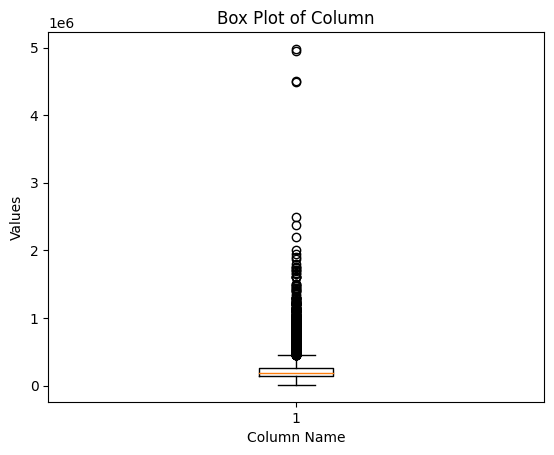

In [321]:
fig, ax = plt.subplots()
ax.boxplot(column_to_plot)
ax.set_title('Box Plot of Column')
ax.set_xlabel('Column Name')
ax.set_ylabel('Values')
plt.show()

## Question 2
Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda? 

In [322]:
# Using ridge regression to find optimal lambda: a scikit-learn implementation
# Load libraries:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV

# quant_var = techSalaries.drop(columns=['company', 'title', 'location','Race_Black','Highschool','basesalary','stockgrantvalue','bonus','gender'], axis=1)
new_data  = quant_var.drop(columns=['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Hispanic', 'Race', 'Education','gender'], axis=1)

column_headers = list(new_data.columns.values)
print("The Column Header :", column_headers)

X = new_data 
y = quant_var['totalyearlycompensation']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101) 


ridge_cv = make_pipeline(StandardScaler(), RidgeCV())
ridge_cv.fit(X_train,y_train)

print(mean_squared_error(y_test, ridge_cv.predict(X_test)))


ridge_cv_coef = ridge_cv[-1].coef_
print(ridge_cv[-1].alpha_)


list(zip(column_headers, ridge_cv_coef))



The Column Header : ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'Age', 'Height', 'Zodiac', 'SAT', 'GPA']
0.12864277912423522
0.1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


[('totalyearlycompensation', 138556.78421320952),
 ('yearsofexperience', 0.17496132898196493),
 ('yearsatcompany', -0.02778692299125396),
 ('Age', 0.0005200418591471134),
 ('Height', 0.00010229422093743779),
 ('Zodiac', 0.004061539434189854),
 ('SAT', 0.11992493229672618),
 ('GPA', 0.003685701211452397)]

In [323]:
# Using ridge regression to find optimal lambda: a scikit-learn implementation
# Load libraries:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV

X = quant_var[['yearsatcompany', 'Age', 'Height', 'SAT','GPA','yearsofexperience']]
y = quant_var['totalyearlycompensation']



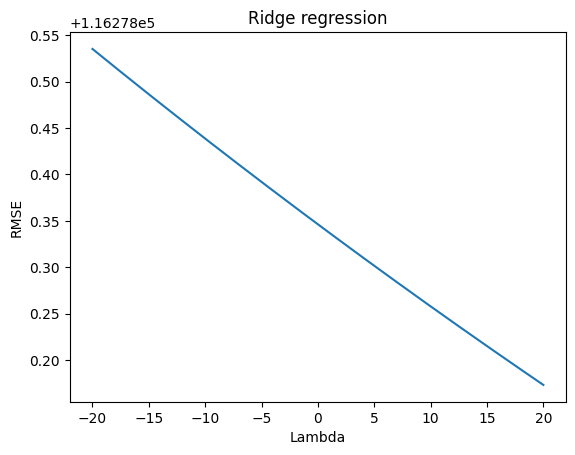

Optimal lambda: 20.0


In [324]:
# X = X.iloc[:,:-1].values 

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101) 


lambdas = np.linspace(-20,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(y_test,ridgeModel.predict(X_test),squared=False)
    cont[ii,1] = error
    
plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])


## Question 3 
Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now? 

In [325]:

# quant_var = techSalaries.drop(columns=['company', 'title', 'location','Race_Black','Highschool','basesalary','stockgrantvalue','bonus','gender'], axis=1)
new_data  = quant_var.drop(columns=['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Hispanic', 'Race', 'Education','gender'], axis=1)

column_headers = list(new_data.columns.values)
print("The Column Header :", column_headers)

X = new_data 
y = quant_var['totalyearlycompensation']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101) 


lasso_cv = make_pipeline(StandardScaler(), RidgeCV())
lasso_cv.fit(X_train,y_train)

mean_squared_error(y_test, lasso_cv.predict(X_test))

lasso_cv_coef = lasso_cv[-1].coef_
print(lasso_cv[-1].alpha_)


list(zip(column_headers, lasso_cv_coef))


The Column Header : ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'Age', 'Height', 'Zodiac', 'SAT', 'GPA']
0.1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


[('totalyearlycompensation', 138556.78421320952),
 ('yearsofexperience', 0.17496132898196493),
 ('yearsatcompany', -0.02778692299125396),
 ('Age', 0.0005200418591471134),
 ('Height', 0.00010229422093743779),
 ('Zodiac', 0.004061539434189854),
 ('SAT', 0.11992493229672618),
 ('GPA', 0.003685701211452397)]

In [326]:
#%% 5. Now do the same thing--but with lasso regression
import warnings
warnings.filterwarnings('ignore') # Just to ignore warnings that might be thrown due to artifically formed data.
# Load libraries:
from sklearn.linear_model import Lasso

x_ = quant_var[['yearsatcompany', 'Age', 'Height', 'SAT','GPA']]quant_var[['yearsatcompany', 'Age', 'Height', 'SAT','GPA']]
y = quant_var['totalyearlycompensation']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 


# Init parameters:
# xTrain, xTest, yTrain, yTest = train_test_split(x.iloc[:,:-1], y.reshape(-1,1), test_size=0.2, random_state=0)
lambdas = np.linspace(-20,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(X_train, y_train)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(y_test,ridgeModel.predict(X_test),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])


SyntaxError: invalid syntax (1944579694.py, line 7)

## Question4

In [ ]:
# get dummy variables 
# dummies = pd.get_dummies(quant_var['gender']).rename(columns=lambda x: 'Male_' + str(x))
# df = pd.concat([quant_var, dummies], axis=1)
# df = quant_var.drop(['gender'], inplace=True, axis=1)
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

gender_data = gender_data.dropna(axis=0)

gender_data['Male'] = np.where(gender_data=='Male', 1, 0)
gender_data['Female'] = np.where(gender_data=='Male', 0, 1)

print(gender_data)

X = quant_var['totalyearlycompensation']
y = gender_data[:43104]
X = X[:43104]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = .20 , random_state = 144)

In [ ]:

logr = LogisticRegression()
logr.fit(x_train.values.reshape(-1,1),y_train)


In [327]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

In [ ]:
logr_liblinear
logr
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_liblinear
y_pred_default = logr.predict(x_test)
y_pred_default
confusion_matrix(y_test,y_pred_liblinear)
confusion_matrix(y_test,y_pred_default)
model_eval(y_test,y_pred_liblinear)
model_eval(y_test,y_pred_default)
auc = roc_auc_score(y_test,y_pred_liblinear)
roc_auc_score(y_test,y_pred_default)
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Question5

In [336]:
X = quant_var[['yearsatcompany', 'Age', 'Height', 'SAT','GPA']]
y = basesalary

x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = .20 , random_state = 144)
logr = LogisticRegression()
logr.fit(x_train.values.reshape(-1,1),y_train)


ValueError: Found input variables with inconsistent numbers of samples: [250565, 50113]

In [ ]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

In [ ]:
logr_liblinear
logr
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_liblinear
y_pred_default = logr.predict(x_test)
y_pred_default
confusion_matrix(y_test,y_pred_liblinear)
confusion_matrix(y_test,y_pred_default)
model_eval(y_test,y_pred_liblinear)
model_eval(y_test,y_pred_default)
auc = roc_auc_score(y_test,y_pred_liblinear)
roc_auc_score(y_test,y_pred_default)
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()